<a href="https://colab.research.google.com/github/manishramamoorthy/Machine-Learning-Project/blob/main/3)_Diabetes_Classification_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Summary of Diabetes Classification Prediction :**

Diabetes Classification Prediction is **Supervised Learning**. The Vision of Diabetes Classification Prediction is **a Patient Diabetes (or) Non-Diabetes**.

## **Content of Diabetes Classification Prediction :**

1) Importing Libraries             
2) Load a Dataset              
3) Data Preprocessing       

    -> 1) Top Five Rows of Dataset        
    -> 2) Last Five Rows of Dataset       
    -> 3) Shape of Dataset            
    -> 4) Data Types             
    -> 5) Information of Dataset          
    -> 6) Checking Missing Values of Dataset      
    -> 7) Droping Duplicates Values of Dataset  
4) EDA(Exploratory Data Analysis)

    -> 1) Statistical Measures                 
    -> 2) Data Visualization          
5) Train and Test Split             
6) Feature Scaling             
7) Build a Model   
                 
    -> 1) Logistic Regression   
    -> 2) K-Nearest Neighbors         
8) Making Prediction               
9) Compare Actual Value and Predicted Values       
10) Evaluation Metrics                     

# **1) Importing Libraries :**

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,plot_roc_curve,roc_curve,roc_auc_score,confusion_matrix,f1_score

# **2) Load a Dataset :**

In [2]:
data = pd.read_csv("/content/diabetes.csv")

# **3) Data Preprocessing :**

**1) Top Five Rows of Dataset**

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**2) Last Five Rows of Dataset**

In [4]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


**3) Shape of Dataset**

In [5]:
data.shape
print("Number of Rows:",data.shape[0])
print("Number of Columns:",data.shape[1])

Number of Rows: 768
Number of Columns: 9


**4) Data Types**

In [6]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

**5) Information of Dataset**

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**6) Checking Missing Values of Dataset**

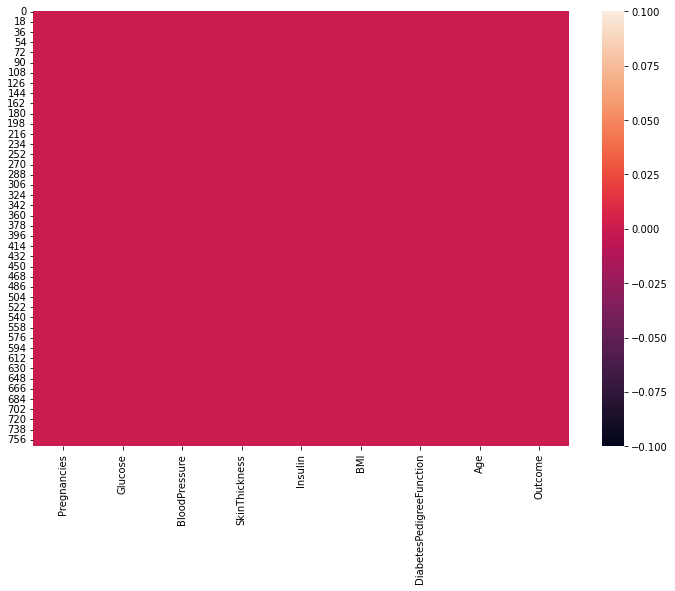

In [8]:
plt.figure(figsize = (12,8))
sns.heatmap(data.isnull())

In [9]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**7) Droping Duplicates Values of Dataset**

In [10]:
dup_data = data.duplicated().any()
print("Any Duplicates Values: ",dup_data)

Any Duplicates Values:  False


# **4) EDA (Exploratory Data Analysis)**

**1) Statistical Measures**

In [11]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**2) Data Visualization**

In [12]:
data.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [13]:
data["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

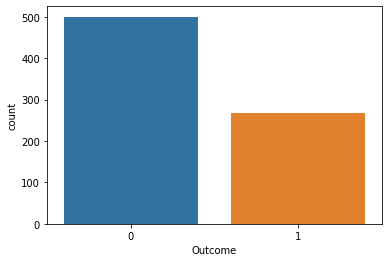

In [14]:
sns.countplot(x="Outcome",data=data)

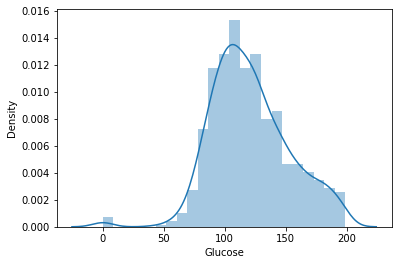

In [15]:
sns.distplot(data["Glucose"])

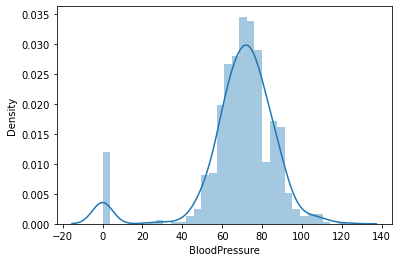

In [16]:
sns.distplot(data["BloodPressure"])

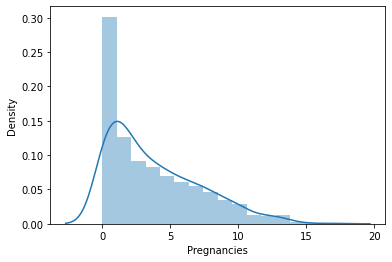

In [17]:
sns.distplot(data["Pregnancies"])

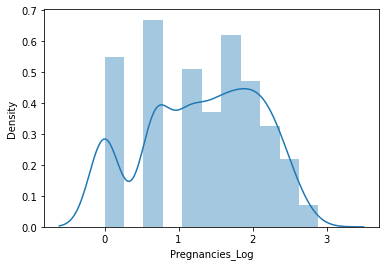

In [18]:
data["Pregnancies_Log"] = np.log(data["Pregnancies"]+1)
sns.distplot(data["Pregnancies_Log"])

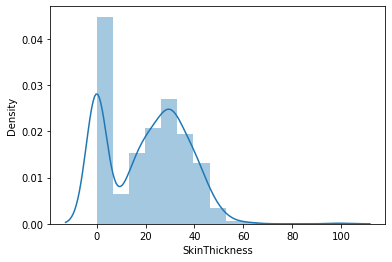

In [19]:
sns.distplot(data["SkinThickness"])

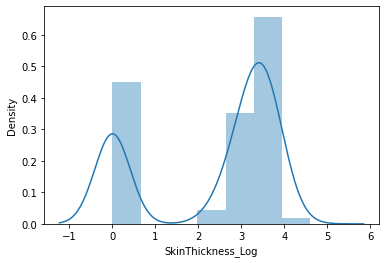

In [20]:
data["SkinThickness_Log"] = np.log(data["SkinThickness"]+1)
sns.distplot(data["SkinThickness_Log"])

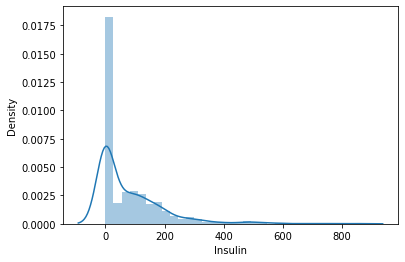

In [21]:
sns.distplot(data["Insulin"])

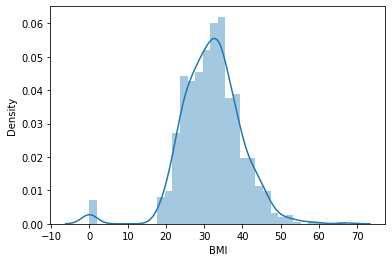

In [22]:
sns.distplot(data["BMI"])

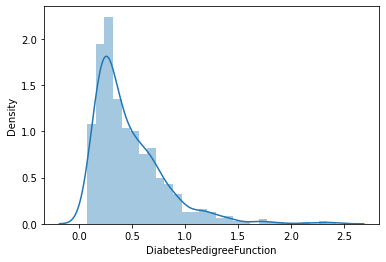

In [23]:
sns.distplot(data["DiabetesPedigreeFunction"])

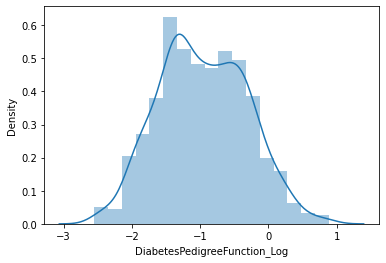

In [24]:
data["DiabetesPedigreeFunction_Log"] = np.log(data["DiabetesPedigreeFunction"])
sns.distplot(data["DiabetesPedigreeFunction_Log"])

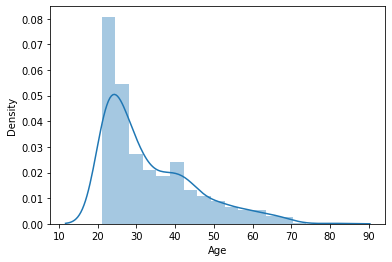

In [25]:
sns.distplot(data["Age"])

In [26]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Pregnancies_Log',
       'SkinThickness_Log', 'DiabetesPedigreeFunction_Log'],
      dtype='object')

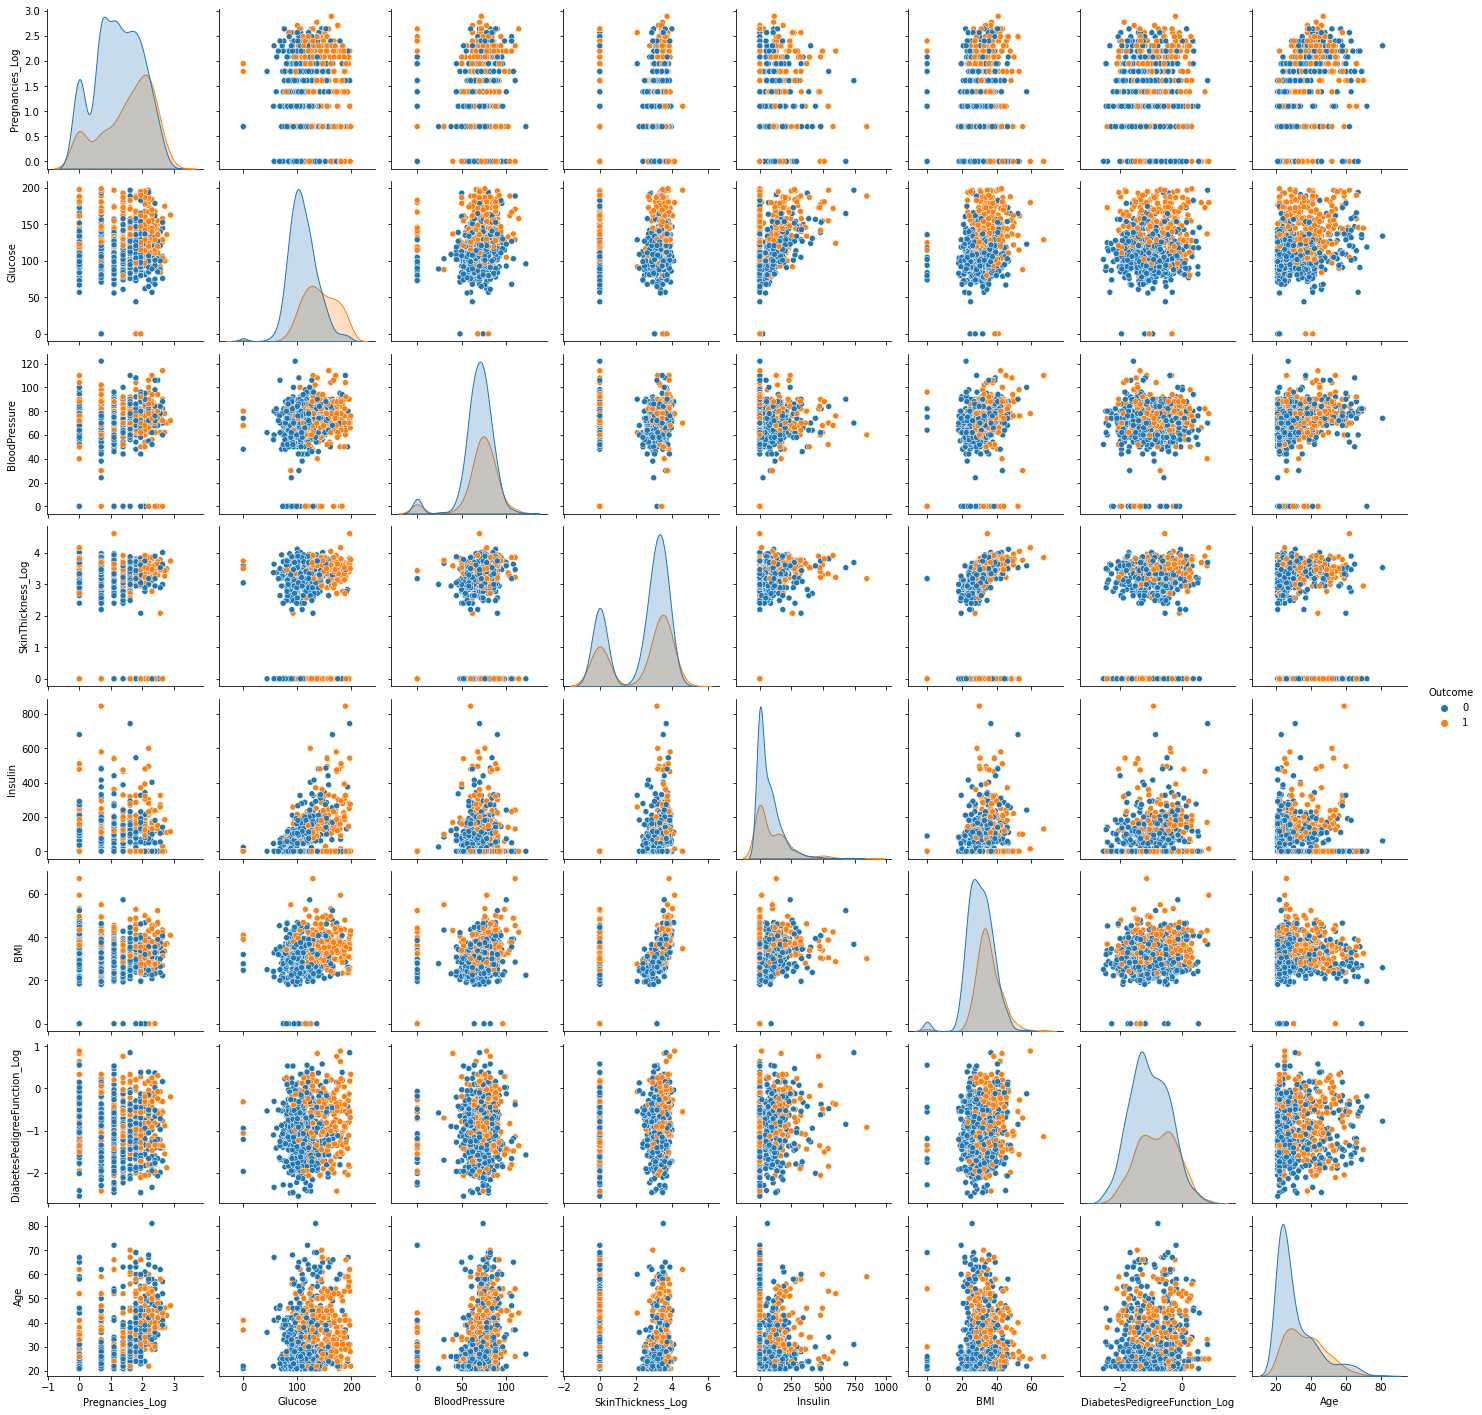

In [27]:
cols = ["Pregnancies_Log", "Glucose", "BloodPressure", "SkinThickness_Log","Insulin","BMI","DiabetesPedigreeFunction_Log","Age","Outcome"]
sns.pairplot(data[cols], hue="Outcome")
plt.show()

In [28]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_Log,SkinThickness_Log,DiabetesPedigreeFunction_Log
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898,0.934761,-0.128552,-0.028542
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581,0.106797,-0.015427,0.115807
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068,0.127069,0.188036,0.047974
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752,-0.105553,0.924229,0.189502
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548,-0.069177,0.461263,0.183394
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695,-0.033333,0.246552,0.145350
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844,-0.057328,0.166136,0.920828
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356,0.505175,-0.190743,0.038831
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000,0.179739,-0.007718,0.180612
Pregnancies_Log,0.934761,0.106797,0.127069,-0.105553,-0.069177,-0.033333,-0.057328,0.505175,0.179739,1.000000,-0.136511,-0.049729


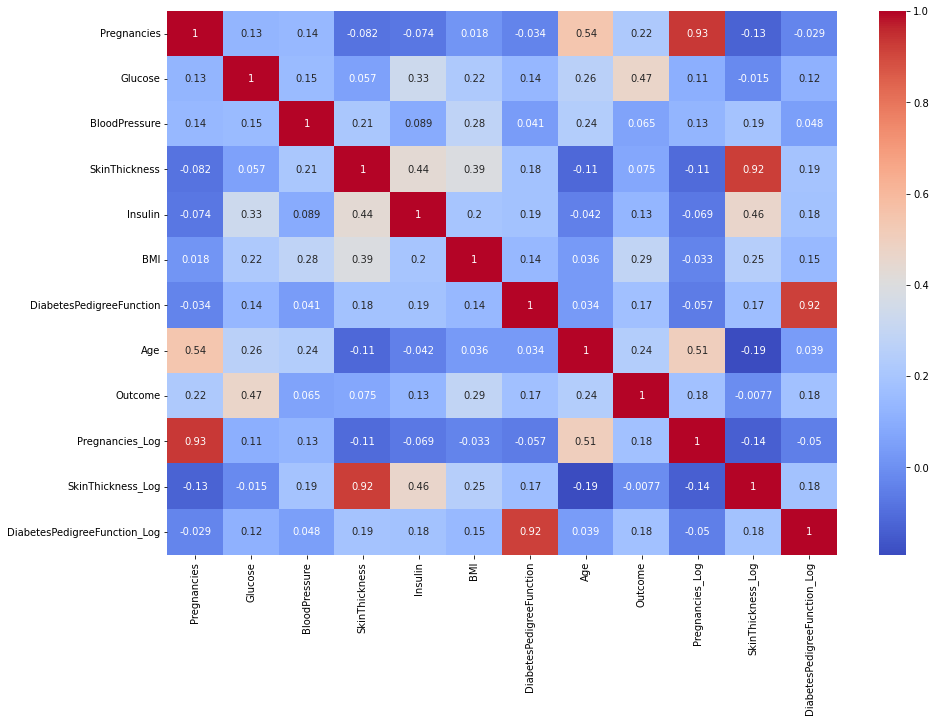

In [29]:
corr = data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,cmap="coolwarm")

# **5) Train and Test Split :**

**Drop Unnecessary Columns :**

In [30]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Pregnancies_Log',
       'SkinThickness_Log', 'DiabetesPedigreeFunction_Log'],
      dtype='object')

In [31]:
data = data.drop(columns=["Pregnancies","SkinThickness","DiabetesPedigreeFunction"],axis=1)
data.head()

,Glucose,BloodPressure,Insulin,BMI,Age,Outcome,Pregnancies_Log,SkinThickness_Log,DiabetesPedigreeFunction_Log
0,148,72,0,33.6,50,1,1.945910,3.583519,-0.466809
1,85,66,0,26.6,31,0,0.693147,3.401197,-1.046969
2,183,64,0,23.3,32,1,2.197225,0.000000,-0.397497
3,89,66,94,28.1,21,0,0.693147,3.178054,-1.789761
4,137,40,168,43.1,33,1,0.000000,3.583519,0.827678


In [32]:
X = data.drop(columns="Outcome",axis=0)
y = data["Outcome"]

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

# **6) Feature Scaling :**

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[ 0.10929203,  0.25215852, -0.68861477, ...,  0.61650593,
        -1.54544255, -0.84668745],
       [ 0.41986041,  0.04751843, -0.68861477, ..., -0.28062085,
        -1.54544255,  0.53215682],
       [ 0.29563306,  1.37767905, -0.68861477, ..., -0.28062085,
        -1.54544255, -0.54487255],
       ...,
       [-0.20127635, -0.05480162, -0.68861477, ..., -0.28062085,
         0.48688447, -2.17996041],
       [-1.25720884,  0.25215852, -0.17174989, ..., -0.80540637,
         0.06519443,  0.4892373 ],
       [ 0.48197409,  0.25215852,  1.06872582, ..., -0.80540637,
         1.00304101,  0.06373589]])

# **7) Build a Model :**

**1) Logistic Regression :**

In [35]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train,y_train)

LogisticRegression()

**2) K-Nearest Neighbors**

In [36]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(X_train,y_train)

KNeighborsClassifier()

# **8) Making Prediction :**

**1) Logistic Regression :**

In [37]:
print(LR.intercept_) # c- Values
print(LR.coef_) # m- Values

[-3.66027725]
[[ 0.02028313 -0.01709491  0.00084939  0.03805194  0.00699098  0.76672414
  -0.14961714  0.52889198]]


In [38]:
data.head()

,Glucose,BloodPressure,Insulin,BMI,Age,Outcome,Pregnancies_Log,SkinThickness_Log,DiabetesPedigreeFunction_Log
0,148,72,0,33.6,50,1,1.945910,3.583519,-0.466809
1,85,66,0,26.6,31,0,0.693147,3.401197,-1.046969
2,183,64,0,23.3,32,1,2.197225,0.000000,-0.397497
3,89,66,94,28.1,21,0,0.693147,3.178054,-1.789761
4,137,40,168,43.1,33,1,0.000000,3.583519,0.827678


In [39]:
LR.predict([[148,72,0,33.6,31,2.197225,3.401197,-1.046969]])

array([1])

**2) K-Nearest Neighbors**

In [40]:
KNN.predict([[148,72,0,33.6,31,2.197225,3.401197,-1.046969]])

array([0])

# **9) Compare Actual Values and Predicted Values :**

**1) Logistic Regression :**

In [41]:
y_pred_LR = LR.predict(X_test)
y_pred_LR

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0])

In [42]:
df = pd.DataFrame({"Actual":y_test,"Predicted":y_pred_LR})
df

,Actual,Predicted
116,1,0
451,1,0
571,0,0
695,1,0
608,0,0
...,...,...
618,1,1
592,1,0
257,0,0
432,0,0


**2) K-Nearest Neighbors**

In [43]:
y_pred_KNN = KNN.predict(X_test)
y_pred_KNN

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0])

In [44]:
df = pd.DataFrame({"Actual":y_test,"Predicted":y_pred_KNN})
df

,Actual,Predicted
116,1,0
451,1,0
571,0,0
695,1,1
608,0,0
...,...,...
618,1,1
592,1,1
257,0,0
432,0,0


# **10) Evaluation Matrics :**

**1) Logistic Regression :**

In [45]:
from sklearn.metrics import accuracy_score,plot_roc_curve,roc_curve,roc_auc_score,confusion_matrix,f1_score

In [46]:
# Accuracy Score
Accuracy_Score = LR.score(X_test,y_test)
print("Accuarcy Score of a Test Data: ",Accuracy_Score)

Accuarcy Score of a Test Data:  0.75


In [47]:
# Confusion Matrix
confusion_matrix(y_test,y_pred_LR)

array([[108,  14],
       [ 34,  36]])

In [48]:
# f1 score
F1_Score = f1_score(y_test,y_pred_LR)
print("f1 Score of Test Data: ",F1_Score)

f1 Score of Test Data:  0.6


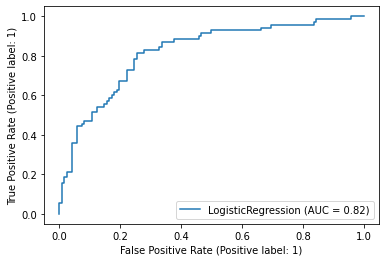

In [49]:
# AUROC Score
plot_roc_curve(LR,X_test,y_test)

**2) K-Nearest Neighbors**

In [50]:
# Accuracy Score
Accuracy_Score = KNN.score(X_test,y_test)
print("Accuarcy Score of a Test Data: ",Accuracy_Score)

Accuarcy Score of a Test Data:  0.765625


In [51]:
# Confusion Matrix
confusion_matrix(y_test,y_pred_KNN)

array([[107,  15],
       [ 30,  40]])

In [52]:
# f1 score
F1_Score = f1_score(y_test,y_pred_KNN)
print("f1 Score of Test Data: ",F1_Score)

f1 Score of Test Data:  0.64


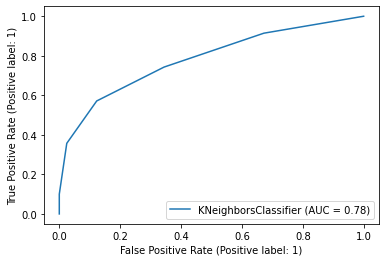

In [53]:
# AUROC Score
plot_roc_curve(KNN,X_test,y_test)